#  Logistic Regression on the Titanic Dataset


**In 1912, the British passenger ship Titanic struck an iceberg, which led to the death of over 1,500 passengers and crew, more than half the people on board.

**You want to construct a model with Logistic Regression that uses available data about the passengers to predict their survival.

**This dataset has a binary response (outcome, dependent) variable called survival(1)and non_survival(0). There are 11 predictor variables: PassengerID,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.We need to filter the data before training the data as there are few unwanted coulmns and empty data fileds like Name and Ticket.we also need to create few dummy variavle where we have it in categorical like Sex and Embarked.

**"Pandas" is mainly a package to handle and operate directly on data.

**"Scikit-learn" is doing machine learning with emphasis on predictive modeling with often large and sparse data

**"Statsmodels" is doing "traditional" statistics and econometrics, with much stronger emphasis on parameter estimation and (statistical) testing.

In [223]:
# import numpy and pandas packages for data manipulations and preparations
# importing seaborn for visualization
import numpy as np
import pandas as pd
import seaborn as sns

In [224]:
# Read titanic data from the local system using pandas package
my_dt = pd.read_csv('titanic_dataset.csv')

In [225]:
#Reading the top 5 rows of the dataset
my_dt.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


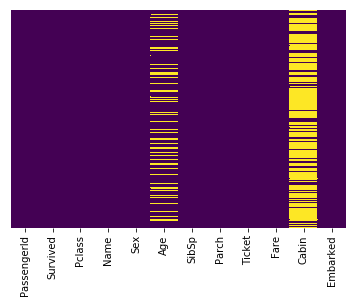

In [226]:
# Checking the blank spaces or null values in the dataset using seaborn heatmap visualization
#Yellow lines in visualization represents null and rest all are filled with data
sns.heatmap(my_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [227]:
# Calculating the median of age column
my_dt.median()['Age']

28.0

In [228]:
#Assign the dataset's median Age to rows where the age data is missing
my_dt['Age'].fillna(my_dt.median()['Age'], inplace=True)


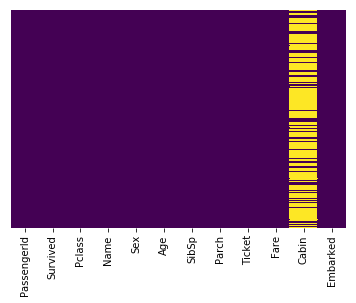

In [229]:
# Checking the blank spaces or null values in the dataset using seaborn heatmap visualization
#Yellow lines in visualization represents null and rest all are filled with data
sns.heatmap(my_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [230]:
# Here we can remove this Cabin columns which have more null fields in this.
#so drop the cabin column from the data
my_dt.drop(['Cabin'],inplace=True,axis=1)

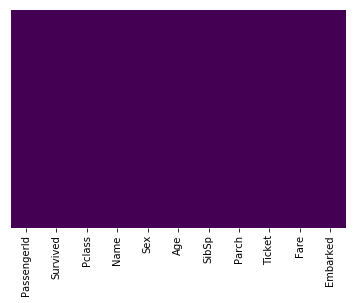

In [231]:
# Checking the blank spaces or null values in the dataset using seaborn heatmap visualization
#Yellow lines in visualization represents null and rest all are filled with data
# if nay single rows are having na we can remove directly.
sns.heatmap(my_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')
my_dt.dropna(inplace=True)

In [232]:
# Creating dummy variables for categorical variables in the dataset columns.
# removing the First column after creating dummy variables
my_dt=pd.get_dummies(my_dt, columns=(['Sex','Embarked']),drop_first=True)


In [233]:
# Drop the unwanted colums from the dataset
my_dt.drop(['Ticket','Name'],axis=1,inplace=True)

In [234]:
#Reading the top 5 rows of the dataset
my_dt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#  Split arrays or matrices into random train and test subsets

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
#Splitting the data into train (75%) and test(25%) of dependent and independent variables with random_state(seed) as 999
#Provided:
        #y: Single column dataframe holding our solution vector for logistic regression
        #x: A dataframe that runs parallel to y, with all the features for our logistic regression
X_train, X_test, Y_train, Y_test = train_test_split(my_dt.drop('Survived', axis=1), my_dt['Survived'],test_size=0.25, random_state=999)


In [237]:
#add_constant: a boolean, if true it will add a constant row to our provided x data. Otherwise this method assumes you've done-so already, or do not want one for some good reason
#If add_constant was true this will be a new dataframe, otherwise it will be X_train
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

In [238]:
# GLM(Generalised Linear Model) is used for logistic regression
# The output of the prdiction is categorised into 2 so we use binomial 
# Fit Logistic Regression.

logit_1 = sm.GLM(Y_train, X_train, family=sm.families.Binomial())


In [239]:
result=logit_1.fit()

In [240]:
# Print summary.
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      656
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -287.66
Date:                Sun, 28 Apr 2019   Deviance:                       575.31
Time:                        23:03:57   Pearson chi2:                     685.
No. Iterations:                     6   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5803      0.689      8.105      0.000       4.231       6.930
PassengerId     0.0002      0.000      0.445     

In [241]:
# Print summary2 having advanced statistics.
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            595.3113  
Link Function:      logit            BIC:            -3689.5347
Dependent Variable: Survived         Log-Likelihood: -287.66   
Date:               2019-04-28 23:03 LL-Null:        -447.65   
No. Observations:   666              Deviance:       575.31    
Df Model:           9                Pearson chi2:   685.      
Df Residuals:       656              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           5.5803   0.6885   8.1048 0.0000  4.2308  6.9298
PassengerId     0.0002   0.0004   0.4446 0.6566 -0.0006  0.0010
Pclass         -1.1185   0.1709  -6.5463 0.0000 -1.4534 -0.7836
Age            -0.0466   0.0089  -5.2173 0.0000 -0.0641

In [242]:
result.params

const          5.580289
PassengerId    0.000185
Pclass        -1.118520
Age           -0.046583
SibSp         -0.348975
Parch         -0.201181
Fare           0.004976
Sex_male      -2.834404
Embarked_Q    -0.109643
Embarked_S    -0.503757
dtype: float64

In [243]:
np.exp(result.params)

const          265.148146
PassengerId      1.000185
Pclass           0.326763
Age              0.954485
SibSp            0.705411
Parch            0.817764
Fare             1.004989
Sex_male         0.058754
Embarked_Q       0.896154
Embarked_S       0.604256
dtype: float64

In [244]:
# Fit Logistic Regression on training data
from sklearn.linear_model import LogisticRegression
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train,Y_train)

C:\Users\prudv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [245]:
logmodel_1.classes_

array([0, 1], dtype=int64)

In [246]:
logmodel_1.coef_

array([[ 2.17511129e+00,  3.25496098e-04, -8.86420981e-01,
        -3.80498364e-02, -3.17261021e-01, -1.81886250e-01,
         7.48490770e-03, -2.55444388e+00,  1.94606681e-02,
        -3.60873434e-01]])

In [247]:
#Calculating the score of train dataset
logmodel_1.score(X_train,Y_train)

0.8003003003003003

In [248]:
# Adding a constant to the test dataset as we also added to the train dataset
X_test = sm.add_constant(X_test)

In [249]:
predictions_1 = logmodel_1.predict(X_test)
predictions_1

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [250]:
from sklearn.metrics import log_loss
log_loss(Y_test, predictions_1)

7.434441512529316

In [251]:
# Calculating the score of test dataset of model_1
logmodel_1.score(X_test, Y_test)

0.7847533632286996

In [252]:
1-logmodel_1.score(X_test, Y_test)

0.2152466367713004

# Summary for model_1:
    Using a classification algorithm like logistic regression in this example enabled us to detect events that will happen in the future.The survival of passanger in the titanic ship.
    
    AIC   :  595.31
    BIC : -3689.53
    Log_loss : 7.43
    Train Accuracy : 80%
    Test Accuracy : 78.4%

# Note:

From the accuracy values of train and test models, test score accuracy is 1.6% less than train accuracy.so, we can say that our model is good trained with the data        
    

In [253]:
X_train = X_train.drop(['Embarked_Q','Fare','PassengerId','Parch','Embarked_S'], axis=1)

In [254]:
# training the train data again with statmodel
X_train = sm.add_constant(X_train)
logit_2 = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
result1=logit_2.fit()
print(result1.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            594.9734  
Link Function:      logit            BIC:            -3712.3791
Dependent Variable: Survived         Log-Likelihood: -292.49   
Date:               2019-04-28 23:04 LL-Null:        -447.65   
No. Observations:   666              Deviance:       584.97    
Df Model:           4                Pearson chi2:   708.      
Df Residuals:       661              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       5.7359    0.5640   10.1694  0.0000   4.6304   6.8414
Pclass     -1.2806    0.1426   -8.9798  0.0000  -1.5601  -1.0011
Age        -0.0468    0.0088   -5.3243  0.0000  -0.0640  -0.0296
SibSp      -0.3919    0.1203   -3.2579  0.0011  -

In [255]:
result1.params

const       5.735917
Pclass     -1.280585
Age        -0.046790
SibSp      -0.391861
Sex_male   -2.824776
dtype: float64

In [256]:
np.exp(result1.params)

const       309.796780
Pclass        0.277875
Age           0.954288
SibSp         0.675798
Sex_male      0.059322
dtype: float64

In [257]:
#Dropping all the insignificant columns from the test data
X_test = X_test.drop(['Embarked_Q','Fare','PassengerId','Parch','Embarked_S'], axis=1)
X_test = sm.add_constant(X_test)

In [258]:
# Fit Logistic Regression on training data after removing insignificant values.
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train,Y_train)

C:\Users\prudv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [259]:
#predictions of model_2 with test data
predictions_2 = logmodel_2.predict(X_test)
predictions_2

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [260]:
#Model_2 score dor train Data
logmodel_2.score(X_train,Y_train)

0.7867867867867868

In [261]:
# Model_2 score for test data
logmodel_2.score(X_test, Y_test)

0.7847533632286996

# Summary for model_2:
    Using a classification algorithm like logistic regression in this example enabled us to detect events that will happen in the future.The survival of passanger in the titanic ship

     AIC : 594.9              
     BIC : -3712.37
     Log_loss : 7.4
     Train Accuracy : 78.6%
     Test Accuracy : 78.4%

# Note:

From the accuracy values of train and test models, test score accuracy is 0.2% less than train accuracy.so, we can say that our model is good trained with the data        
    

# Calculate Accuracy

In [262]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions_2)

0.7847533632286996

# Calculate number of correctly classified observations

In [263]:
accuracy_score(Y_test, predictions_2, normalize=False)

175

# Calculate number of incorrectly classified observations.

In [264]:
len(Y_test) - accuracy_score(Y_test, predictions_2, normalize=False)

48

# Calculate log loss

In [265]:
from sklearn.metrics import log_loss
log_loss(Y_test, predictions_2)

7.434452269445417

# Confusion matrix

In [266]:
# import matplotlib and seaborn for visualization and metrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
confusion_mat = confusion_matrix(Y_test, predictions_2)

In [268]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [269]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,121,27
Actual pos,21,54


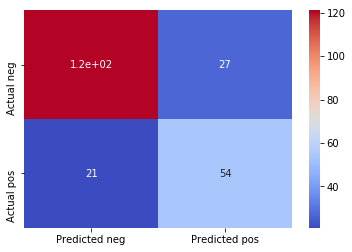

In [270]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

# Calculate precision and recall scores¶


In [271]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_test, predictions_2)

0.6666666666666666

In [272]:
recall_score(Y_test, predictions_2)

0.72

# F1 Score

In [273]:
from sklearn.metrics import f1_score
f1_score(Y_test, predictions_2)

0.6923076923076923

In [274]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = logmodel_2.predict_proba(X_test)[::,1]
auc = roc_auc_score(Y_test, probs)
print(auc)

0.8322522522522523


In [275]:
fpr, tpr, threshold = roc_curve(Y_test, probs)

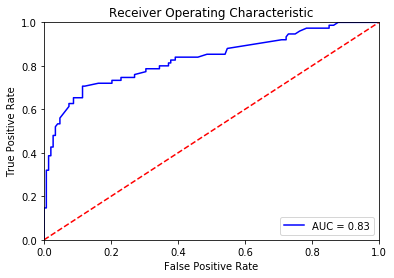

In [276]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# We can also calculate the optimal threshold probability from this ROC curve.


In [279]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [280]:
optimal_threshold

0.5421626148717178

# Updata model based on optimal probability threshold

Let's use this new optimal threshold and update our predictions

In [281]:
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [282]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)

In [283]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [284]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,131,17
Actual pos,23,52


In [285]:
accuracy_score(Y_test, new_predictions)

0.820627802690583

In [286]:
log_loss(Y_test, new_predictions)

6.195357170191663

#  Conclusion:

**Using a classification algorithm like logistic regression in this example enabled us to detect events that will happen in the future.The survival of passanger in the titanic ship.
        
**From the above 2 models and optimal probability threshold we observed that,

**Model_1 with all the features and including all insignificant values from the data set having an accuracy score of test of 78.4% which is equal for significant model_2

**AIC of model_1 is 595.31 with insignifican values but the later after removing the insigficant values the AIC is 594.9 which actually decreased so we can conclude that the way which we following in right direction.

**F1 score is also a key factor verifying the model condition to check weather that model is good or not.here,0.692 is a says that this model is good.

**Note:

**The optimal probability threshold vs model_2

**The test model prediction accuracy will pure significant features is 78.4% is comparitive with optimal probability threshold od new predictions is 82%.so, the model with the new test is functioning  good.

**As there is an increase in Accuracy of 3.6% the log error is decreased from 7.4 of model_2 to 6.19 of optinal treshold.

**The number of correct and incorrect predictions of model_2 is 175 and 48 and optimal treshold is 131 and 52 .so,here we can observe increase in correct prediction and derease in incorrect prediction.

**Finally, From the above all statements model_2 is the best fit model for predicting the survival from titanic dataset with the given features. 